In [33]:
pip install rdflib networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [81]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, URIRef
import hashlib
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [76]:
# Hàm nén URI và trả về danh sách các bộ ba RDF trong 1 file
def compress_uri_triples(rdf_file_path):
    g = Graph()
    g.parse(rdf_file_path, format="application/rdf+xml")
    triples = []
    for subj, pred, obj in g:
        subj = URIRef(subj).split("/")[-1]  # Lấy phần cuối cùng của URI
        obj = URIRef(obj).split("/")[-1]  # Lấy phần cuối cùng của URI
        pred = URIRef(pred).split("#")[-1]  # Lấy phần cuối cùng của URI
        triples.append((subj, pred, obj))
    return triples

# Hàm in bộ ba RDF
def print_triples(triples):
    print("\nDANH SÁCH CÁC BỘ BA RDF SAU KHI NÉN URI:")
    if len(triples[0]) == 3:
        for idx, (subj, pred, obj) in enumerate(triples, start=1):
            print(f"{idx}. ({subj}, {pred}, {obj})")
    elif len(triples[0]) == 5:
        for idx, (x, y, z, alpha, beta) in enumerate(triples, start=1):
            print(f"{idx}. ({x}, {y}, {z}, α = {alpha}, β = {beta})")

def visualize_rdf_graph(triples):
    nx_graph = nx.DiGraph()
    for subj, pred, obj in triples:
        nx_graph.add_edge(subj, obj, label=pred)
    pos = nx.spring_layout(nx_graph, k=0.5, seed=42)
    plt.figure(figsize=(12, 12))
    nx.draw(nx_graph, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=12, font_weight="bold", arrows=True)
    edge_labels = nx.get_edge_attributes(nx_graph, 'label')
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_size=12)
    plt.title("Mô hình hóa dữ liệu RDF")
    plt.show()


In [64]:
# Hàm chuyển đổi bộ ba RDF thành các giá trị số không trùng
def convert_triples_to_coordinates(triples):
    data_size = len(triples)
    coordinates = []
    entity_mapping = {}

    for subj, pred, obj in triples:
        if subj not in entity_mapping:
            entity_mapping[subj] = int(hashlib.md5(subj.encode()).hexdigest(), 16) % (data_size) + 1
        if pred not in entity_mapping:
            entity_mapping[pred] = int(hashlib.md5(pred.encode()).hexdigest(), 16) % (data_size) + 1
        if obj not in entity_mapping:
            entity_mapping[obj] = int(hashlib.md5(obj.encode()).hexdigest(), 16) % (data_size) + 1

        x = entity_mapping[subj]
        y = entity_mapping[pred]
        z = entity_mapping[obj]
        coordinates.append((x, y, z))

    # In ra mã hóa của các thực thể
    print("\nMÃ HÓA CÁC THỰC THỂ:")
    for entity, code in entity_mapping.items():
        print(f"{entity} = {code}")

    return coordinates


In [75]:
# Hàm thêm tần suất đếm vào các bộ ba
def add_frequency_to_triples(coordinates):
    subject_count = Counter()
    object_count = Counter()

    # Đếm tần suất xuất hiện của mỗi subject và object
    for x, y, z in coordinates:
        subject_count[x] += 1
        object_count[z] += 1

    triples_with_frequency = []
    for x, y, z in coordinates:
        alpha = object_count[x]  # Số lần xuất hiện của x làm object của bộ ba khác
        beta = subject_count[z]  # Số lần xuất hiện của z làm subject của bộ ba khác
        triples_with_frequency.append((x, y, z, alpha, beta))

    return triples_with_frequency

In [92]:
# Hàm vẽ biểu đồ phân đoạn ba chiều
def plot_3d_coordinates(triples):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Trích xuất các tọa độ x, y, z từ danh sách các bộ ba
    xs = [x for x, y, z, alpha, beta in triples]
    ys = [y for x, y, z, alpha, beta in triples]
    zs = [z for x, y, z, alpha, beta in triples]

    # Vẽ các điểm trong không gian ba chiều
    ax.scatter(xs, ys, zs, c='b', marker='o')

    # Thiết lập nhãn cho các trục
    ax.set_xlabel('Subject')
    ax.set_ylabel('Predicate')
    ax.set_zlabel('Object')

    # Gán nhãn cho các điểm là tọa độ của điểm đó
    for x, y, z, alpha, beta in triples:
        ax.text(x, y, z, f'({x}, {y}, {z})', fontsize=10, color='blue')

    # Thiết lập tiêu đề
    plt.title("Biểu đồ phân đoạn ba chiều của các bộ ba RDF")

    
    plt.show()



In [86]:
# Chạy phần mô hình hóa dữ liệu RDF
def run_mdh(data="data_demo", print_output=False):
    rdf_directory = "../data/LUBM_Data/" + data
    all_triples = []
    for file_name in os.listdir(rdf_directory):
        if file_name.endswith(".rdf"):
            rdf_file_path = os.path.join(rdf_directory, file_name)
            triples = compress_uri_triples(rdf_file_path)
            all_triples.extend(triples)
    if(print_output):
        print("\n1.1. DANH SÁCH CÁC BỘ BA RDF SAU KHI NÉN URI:")
        print_triples(all_triples)

    visualize_rdf_graph(all_triples)

    all_triples = convert_triples_to_coordinates(all_triples)
    if(print_output):
        print("\n1.2. CHUYỂN HÓA GIÁ TRỊ S, P, O THÀNH TỌA ĐỘ SỐ HỌC:")
        print_triples(all_triples)

     # Thêm tần suất đếm vào các bộ ba và in ra
    all_triples = add_frequency_to_triples(all_triples)
    if(print_output):
        print("\n1.3. THÊM TẦN SUẤT VÀO CÁC BỘ BA")
        print_triples(all_triples)

    # Vẽ biểu đồ phân đoạn ba chiều
    plot_3d_coordinates(all_triples)



1.1. DANH SÁCH CÁC BỘ BA RDF SAU KHI NÉN URI:

DANH SÁCH CÁC BỘ BA RDF SAU KHI NÉN URI:
1. (Julia, project, LinkedData)
2. (Brown, knows, Tina)
3. (Lucy, project, SemanticWeb)
4. (Julia, project, Ontology)
5. (Maya, knows, Lucy)
6. (Smith, knows, Mary)
7. (Julia, project, SemanticWeb)
8. (Holis, project, Ontology)
9. (Tina, project, LinkedData)
10. (Tina, project, BigData)
11. (Lucy, project, LinkedData)
12. (Maya, knows, Mary)
13. (Smith, knows, Lucy)
14. (Maya, knows, Tina)
15. (Brown, knows, Holis)
16. (Smith, knows, Julia)
17. (Holis, project, DataMining)


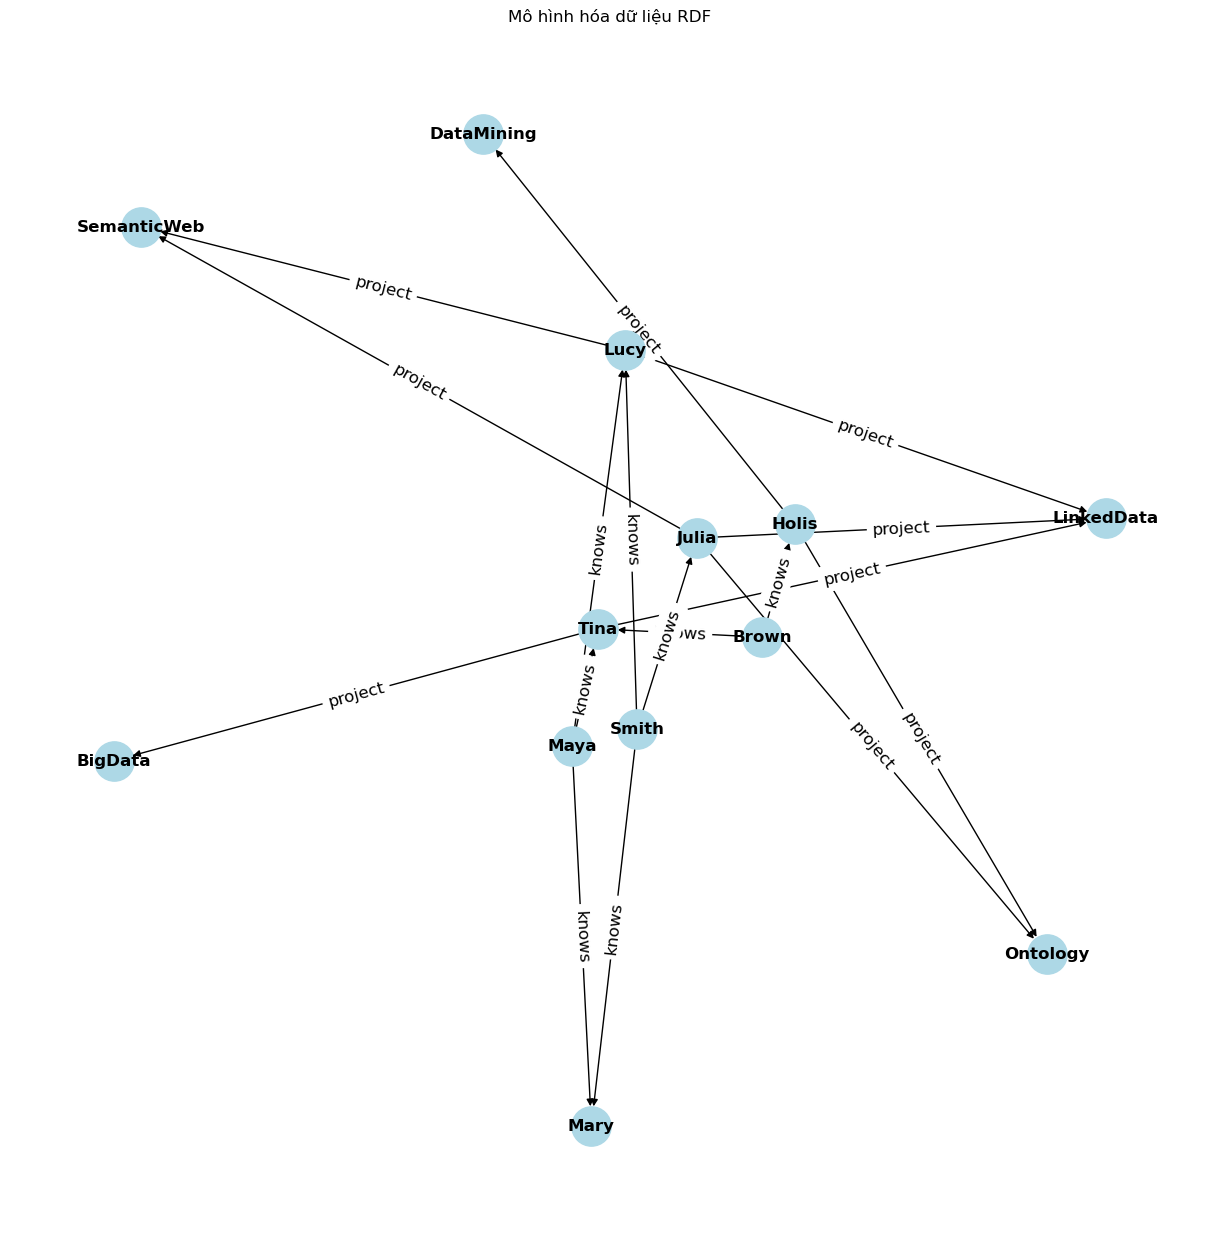


MÃ HÓA CÁC THỰC THỂ:
Julia = 5
project = 7
LinkedData = 13
Brown = 4
knows = 17
Tina = 14
Lucy = 13
SemanticWeb = 12
Ontology = 13
Maya = 14
Smith = 7
Mary = 17
Holis = 1
BigData = 4
DataMining = 13

1.2. CHUYỂN HÓA GIÁ TRỊ S, P, O THÀNH TỌA ĐỘ SỐ HỌC:

DANH SÁCH CÁC BỘ BA RDF SAU KHI NÉN URI:
1. (5, 7, 13)
2. (4, 17, 14)
3. (13, 7, 12)
4. (5, 7, 13)
5. (14, 17, 13)
6. (7, 17, 17)
7. (5, 7, 12)
8. (1, 7, 13)
9. (14, 7, 13)
10. (14, 7, 4)
11. (13, 7, 13)
12. (14, 17, 17)
13. (7, 17, 13)
14. (14, 17, 14)
15. (4, 17, 1)
16. (7, 17, 5)
17. (1, 7, 13)

1.3. THÊM TẦN SUẤT VÀO CÁC BỘ BA

DANH SÁCH CÁC BỘ BA RDF SAU KHI NÉN URI:
1. (5, 7, 13, α = 1, β = 2)
2. (4, 17, 14, α = 1, β = 5)
3. (13, 7, 12, α = 8, β = 0)
4. (5, 7, 13, α = 1, β = 2)
5. (14, 17, 13, α = 2, β = 2)
6. (7, 17, 17, α = 0, β = 0)
7. (5, 7, 12, α = 1, β = 0)
8. (1, 7, 13, α = 1, β = 2)
9. (14, 7, 13, α = 2, β = 2)
10. (14, 7, 4, α = 2, β = 2)
11. (13, 7, 13, α = 8, β = 2)
12. (14, 17, 17, α = 2, β = 0)
13. (7, 17, 13, α = 0,

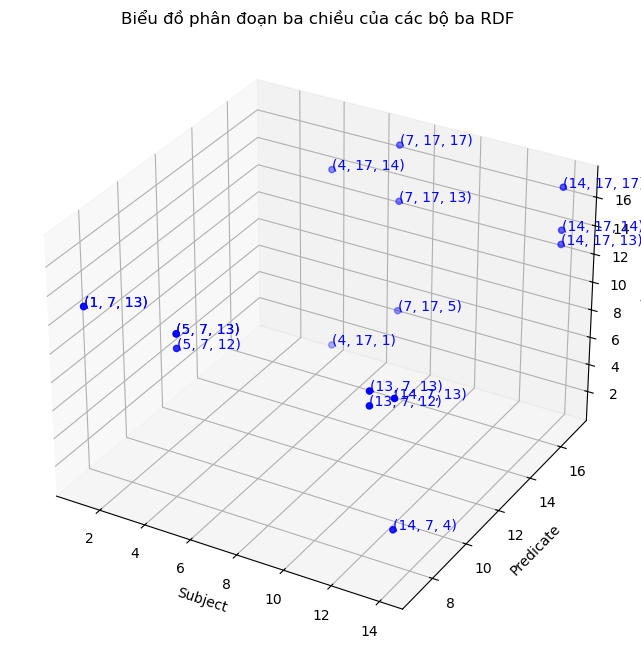

In [93]:
run_mdh("data_demo", True)

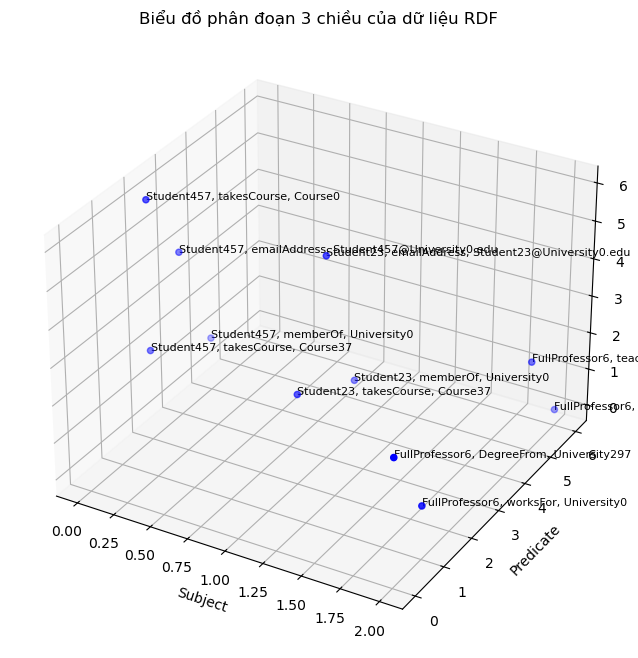

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dữ liệu triple (s, p, o) từ ví dụ
triples = [
    ("Student457", "memberOf", "University0"),
    ("Student457", "emailAddress", "Student457@University0.edu"),
    ("Student457", "takesCourse", "Course37"),
    ("Student457", "takesCourse", "Course0"),
    ("FullProfessor6", "teacherOf", "Course37"),
    ("FullProfessor6", "DegreeFrom", "University297"),
    ("FullProfessor6", "worksFor", "University0"),
    ("FullProfessor6", "researchInterest", "Research10"),
    ("Student23", "memberOf", "University0"),
    ("Student23", "emailAddress", "Student23@University0.edu"),
    ("Student23", "takesCourse", "Course37")
]

# Gán các chỉ số cho mỗi thành phần
subjects = {subj: idx for idx, subj in enumerate(set(triple[0] for triple in triples))}
predicates = {pred: idx for idx, pred in enumerate(set(triple[1] for triple in triples))}
objects = {obj: idx for idx, obj in enumerate(set(triple[2] for triple in triples))}

# Tạo các danh sách x, y, z cho biểu đồ 3D
x = [subjects[subj] for subj, _, _ in triples]
y = [predicates[pred] for _, pred, _ in triples]
z = [objects[obj] for _, _, obj in triples]

# Tạo hình ảnh biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ các điểm trong không gian 3D
ax.scatter(x, y, z, c='b', marker='o')

# Gắn nhãn cho các trục
ax.set_xlabel('Subject')
ax.set_ylabel('Predicate')
ax.set_zlabel('Object')
ax.set_title('Biểu đồ phân đoạn 3 chiều của dữ liệu RDF')

# Gắn nhãn cho mỗi điểm
for i in range(len(triples)):
    ax.text(x[i], y[i], z[i], f"{triples[i][0]}, {triples[i][1]}, {triples[i][2]}", size=8, zorder=1)

plt.show()
